In [4]:
import pandas as pd 
import numpy  as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [5]:
dataset = pd.read_csv(r"C:\Users\vish8\OneDrive\Desktop\Cursos\MLopsBootcamp\Complete-MLOps-Bootcamp-v2\Packaging-ML-Model\loan_approval_dataset.csv")
dataset.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [6]:
dataset.shape #entendendo quantas linhas e quantas colunas tem o dataset 

(4269, 13)

In [7]:
#Verificando o numero de elementos exclusivos
dataset.nunique()

loan_id                      4269
 no_of_dependents               6
 education                      2
 self_employed                  2
 income_annum                  98
 loan_amount                  378
 loan_term                     10
 cibil_score                  601
 residential_assets_value     278
 commercial_assets_value      188
 luxury_assets_value          379
 bank_asset_value             146
 loan_status                    2
dtype: int64

In [8]:
#Pegando valores duplicados
dataset.duplicated().sum()

0

In [9]:
dataset.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [10]:
dataset.columnsn = [c.strip() for c in dataset.columns]#Retira os espaços em branco



C:\Users\vish8\AppData\Local\Temp\ipykernel_2852\2063864294.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dataset.columnsn = [c.strip() for c in dataset.columns]#Retira os espaços em branco


In [11]:
dataset.columns = [c.strip() for c in dataset.columns] # Retira os espaços em branco
y = dataset['loan_status']
X = dataset.drop('loan_status', axis=1)

In [12]:
X.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000


In [13]:
X.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 400.3+ KB


In [15]:
#Adicionando colunas para ajudar no preprocessamento
X['total_assets_value'] = X['residential_assets_value'] + X['commercial_assets_value'] + X['bank_asset_value'] + X['luxury_assets_value']
X.drop(columns= ['residential_assets_value', 'commercial_assets_value', 'bank_asset_value', 'luxury_assets_value'], inplace=True)

# O parâmetro inplace=True faz com que a operação de remoção de colunas seja feita diretamente no DataFrame original, sem a necessidade de criar uma cópia.

In [16]:
X.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,total_assets_value
0,1,2,Graduate,No,9600000,29900000,12,778,50700000
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,17000000
2,3,3,Graduate,No,9100000,29700000,20,506,57700000
3,4,3,Graduate,No,8200000,30700000,8,467,52700000
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,55000000


In [17]:
dataset.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

Note: you may need to restart the kernel to use updated packages.


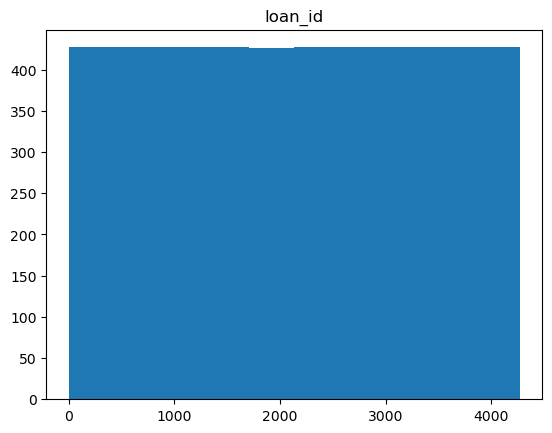

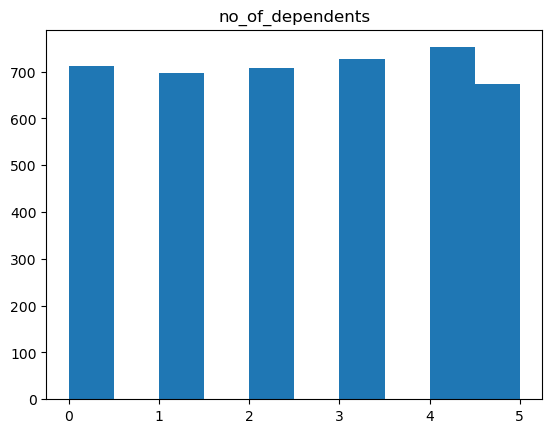

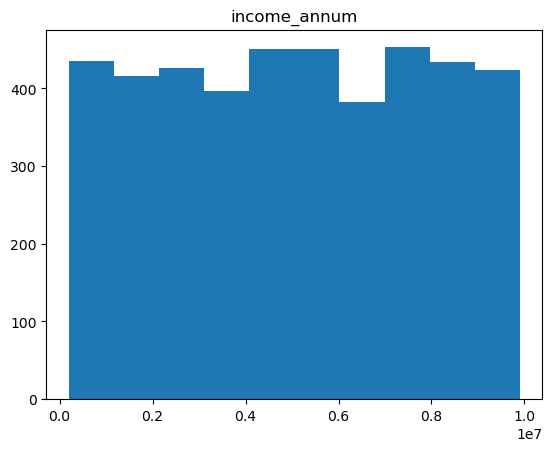

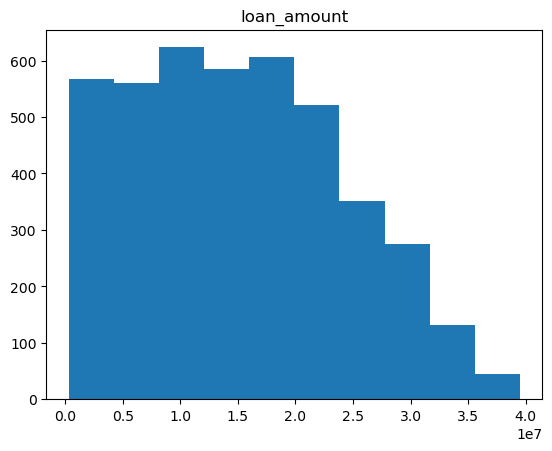

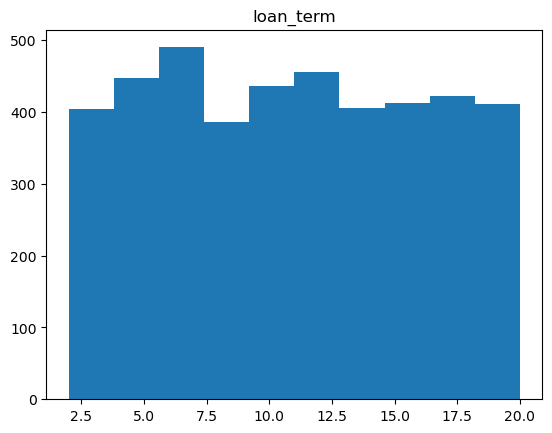

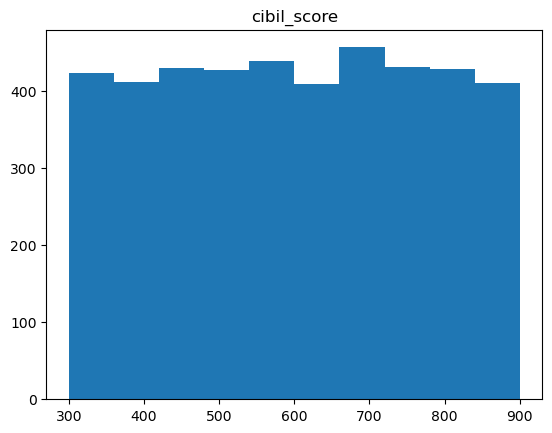

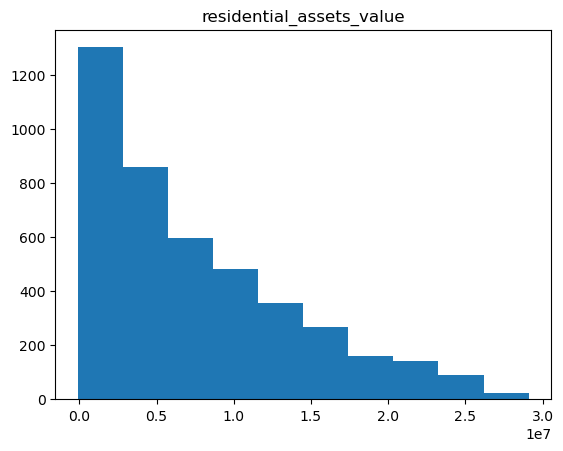

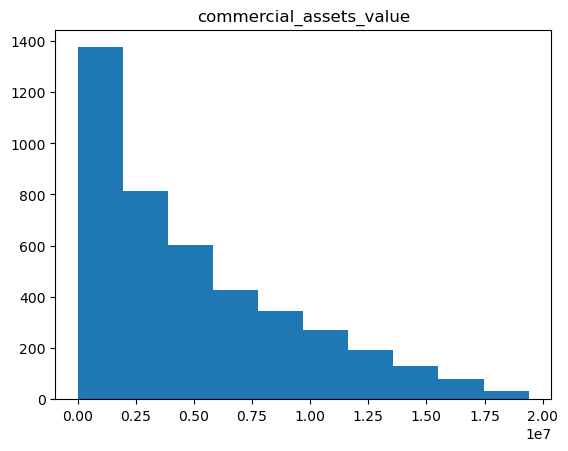

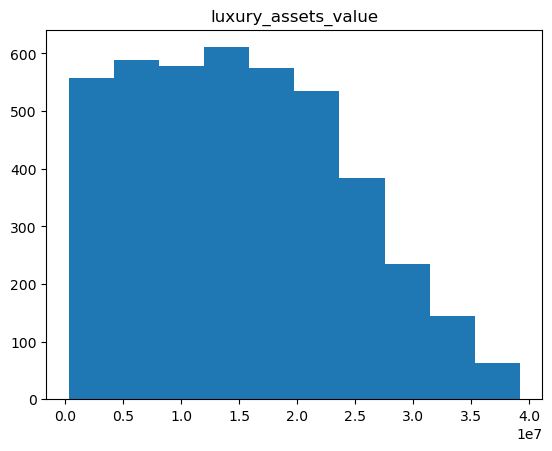

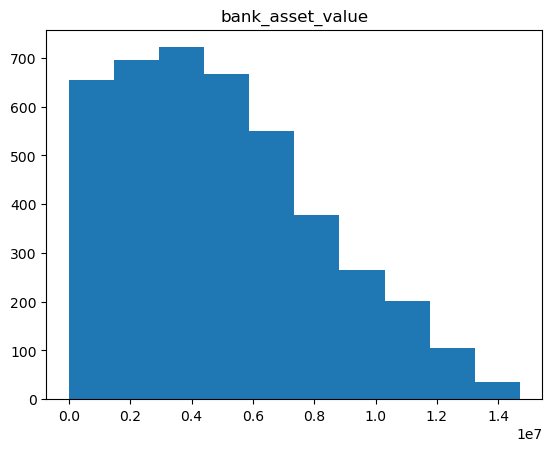

In [18]:
#Histograma para analisar as variavels
%pip install matplotlib
import matplotlib.pyplot as plt
colunas_numericas = dataset.select_dtypes(include=[np.number]).columns

for column in colunas_numericas:
    plt.hist(dataset[column])
    plt.title(column)
    plt.show()

In [21]:
import seaborn as sns

# Matriz de correlação
correlation_matrix = dataset.corr()

# Plotando a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

# Gráfico de dispersão para variáveis correlacionadas
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dataset, x='income_annum', y='loan_amount')
plt.title('Relação entre Income Annun e Loan Amount')
plt.xlabel('Income Annun')
plt.ylabel('Loan Amount')
plt.show()


ValueError: could not convert string to float: ' Graduate'

education: 2 valores únicos


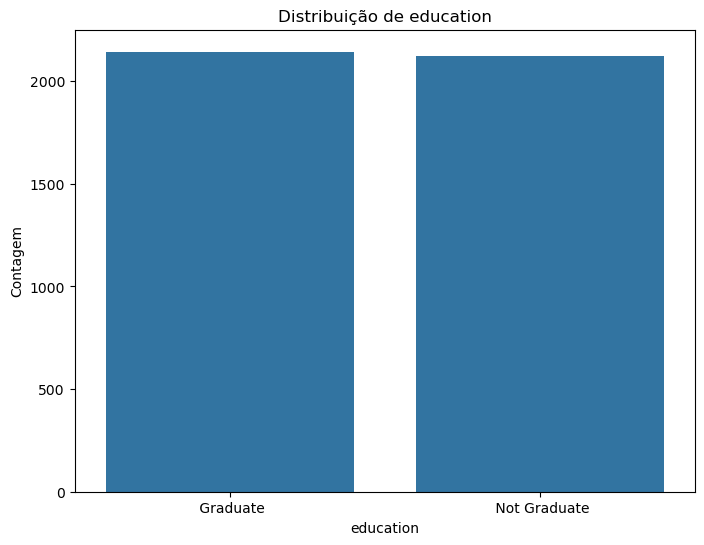

self_employed: 2 valores únicos


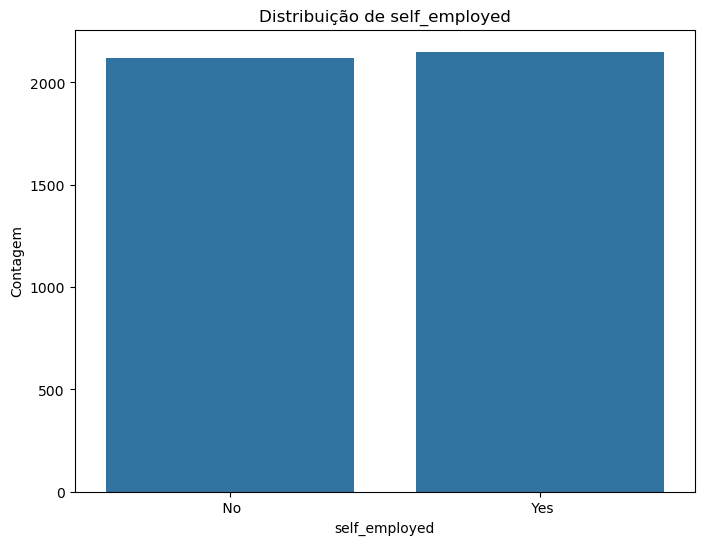

loan_status: 2 valores únicos


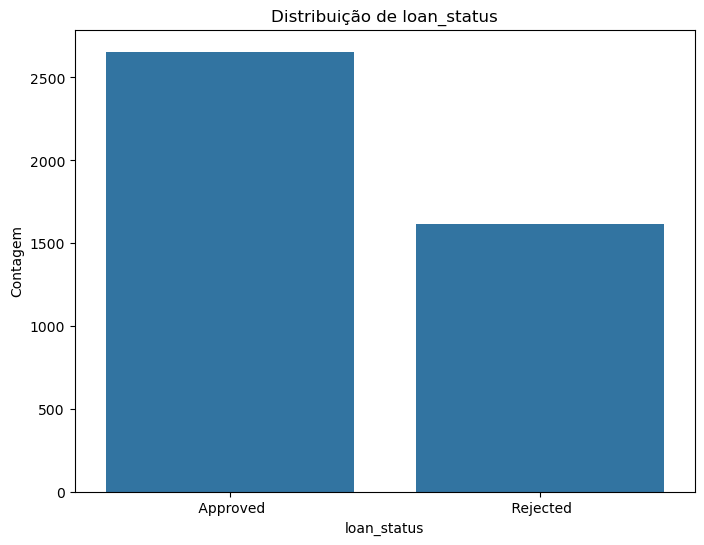

In [22]:
# Variáveis categóricas
categorical_columns = dataset.select_dtypes(include=['object']).columns

# Contando os valores únicos para cada variável categórica
for column in categorical_columns:
    print(f'{column}: {dataset[column].nunique()} valores únicos')

    # Plotando gráfico de barras
    plt.figure(figsize=(8, 6))
    sns.countplot(data=dataset, x=column)
    plt.title(f'Distribuição de {column}')
    plt.xlabel(column)
    plt.ylabel('Contagem')
    plt.show()


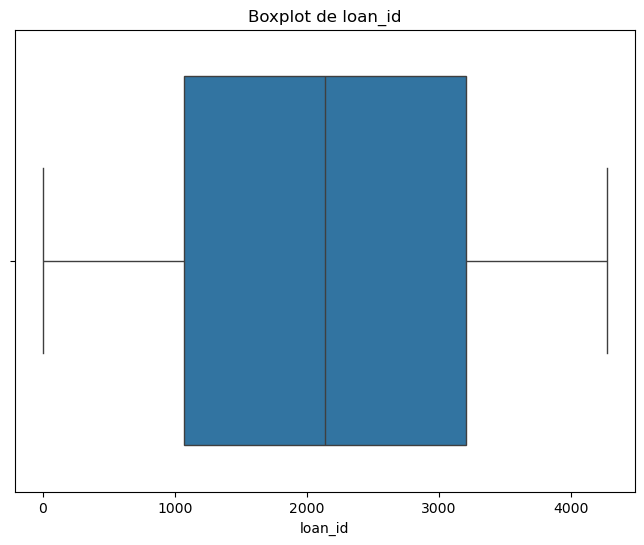

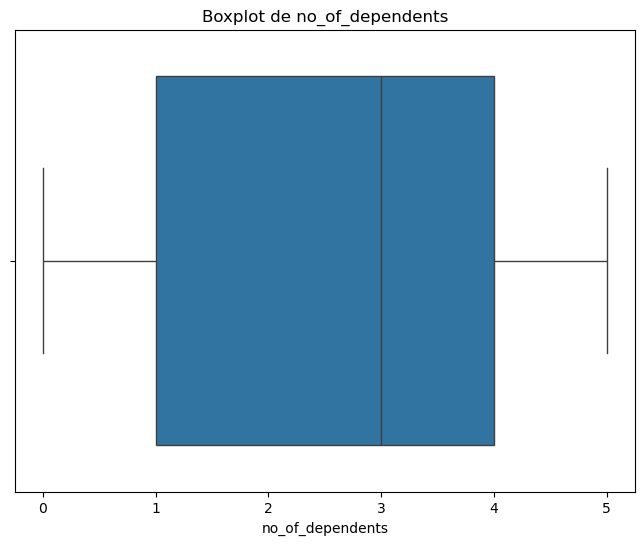

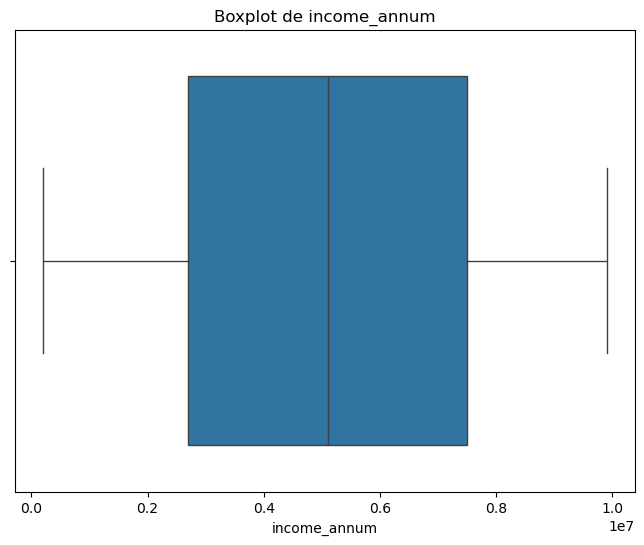

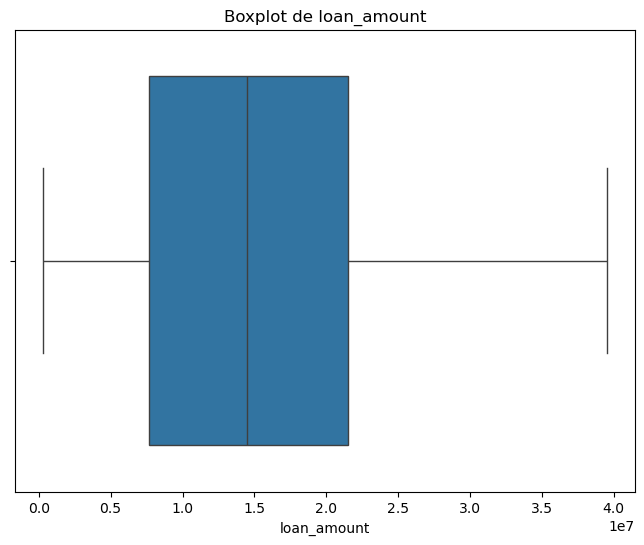

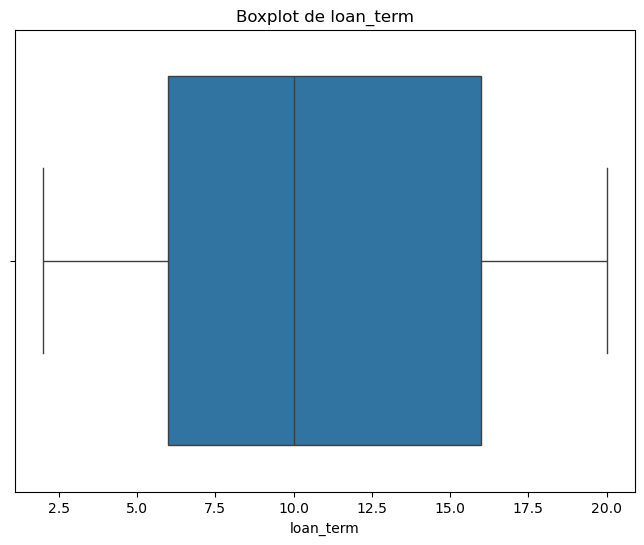

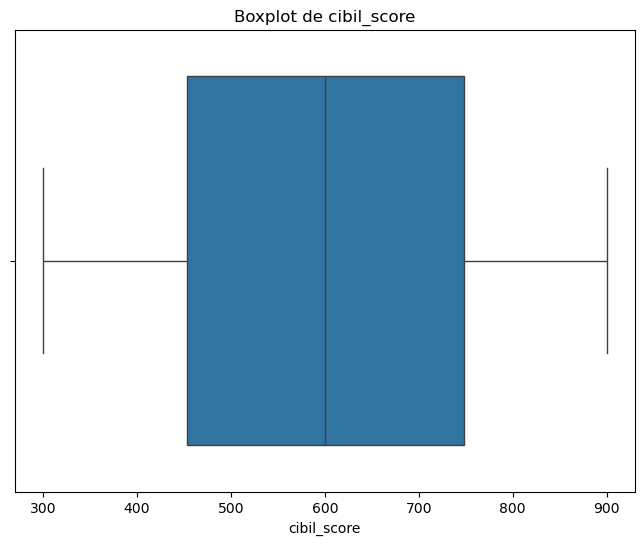

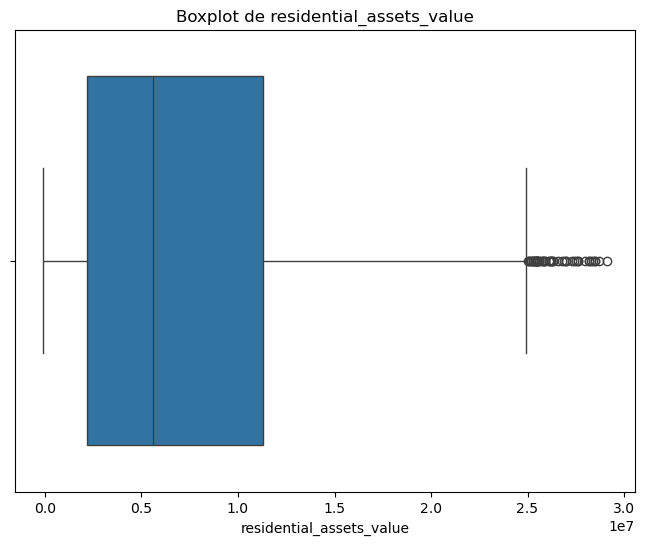

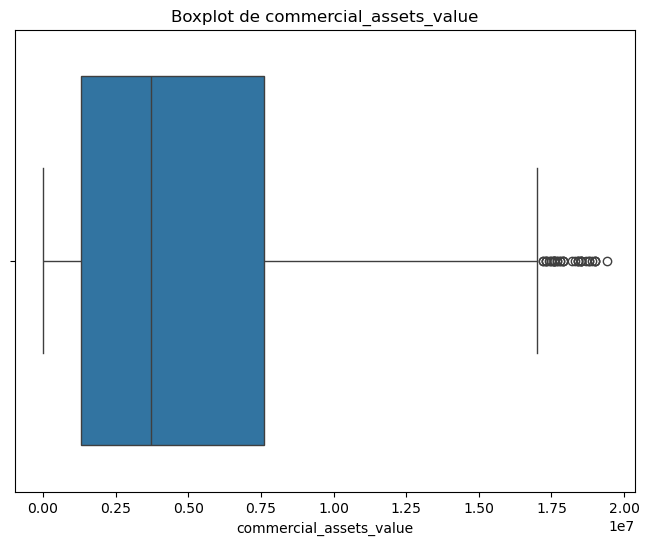

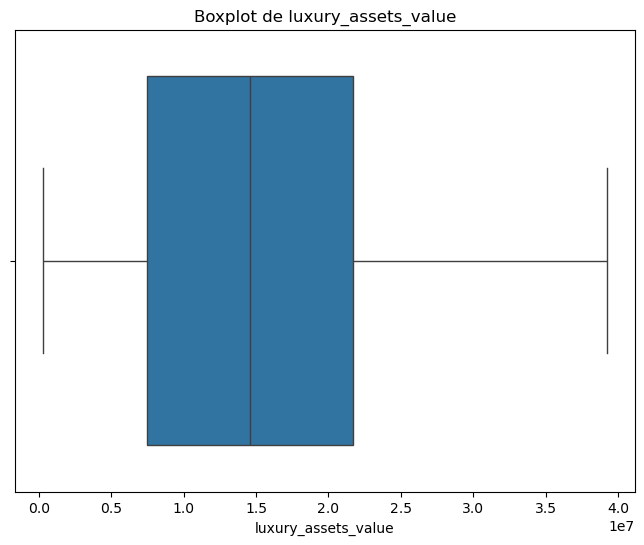

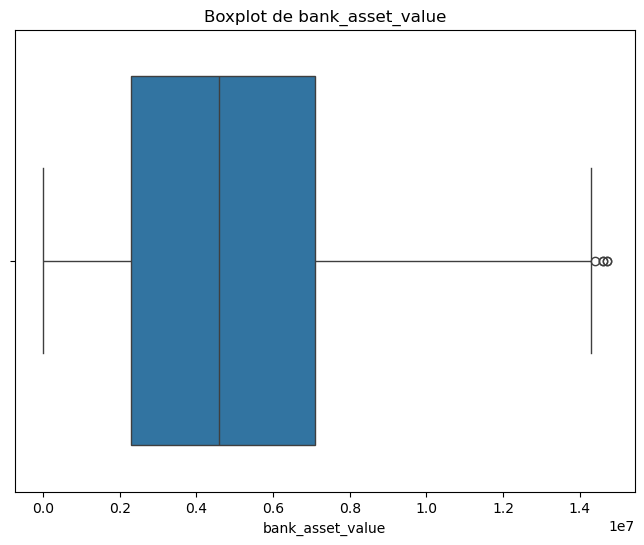

In [24]:
# Boxplot para detectar outliers nas variáveis numéricas
for column in colunas_numericas:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=dataset[column])
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)
    plt.show()


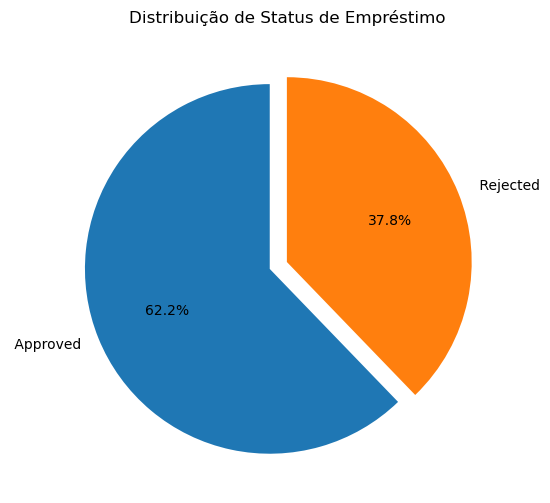

In [25]:
# Contagem de empréstimos aprovados e rejeitados
loan_status_counts = dataset['loan_status'].value_counts()

# Plotando gráfico de pizza para distribuição de status de empréstimo
plt.figure(figsize=(8, 6))
loan_status_counts.plot.pie(autopct='%1.1f%%', startangle=90, explode=(0.1, 0))
plt.title('Distribuição de Status de Empréstimo')
plt.ylabel('')
plt.show()


In [ ]:
X['education'].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [31]:
X['self_employed'].value_counts()

self_employed
Yes    2150
No     2119
Name: count, dtype: int64

In [29]:
y.unique()

array([' Approved', ' Rejected'], dtype=object)

In [30]:
X['education'] = X['education'].str.strip()
X['self_employed'] = X['self_employed'].str.strip()
y = y.str.strip()

In [32]:
X['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

#Convert the above columns into numerical format


In [39]:
#Transform to binary
#Colocando mais controle aonde é positivo -> Essa função abaixo se assemlha ao get_dummies do pandas, mas com mais controle
def transform_to_binary(df, columns_to_transform):
    """
    Transforms specified categorical columns in a DataFrame to binary (0 and 1)

    Args: 
    df: DataFrame
    columns_to_transform: list of column names to transform to binary

    Returns:
    DataFrame with specified columns transformed to binary
    
    """
    for columns_name, positive_values in columns_to_transform.items():
        df[columns_name] = df[columns_name].apply(lambda x: 1 if x in positive_values else 0)
    return df

columns_to_transform = {
        'education': ['Graduate'],
        'self_employed': ['Yes']}


# Call the function with the corrected columns_to_transform
transformed_x = transform_to_binary(X, columns_to_transform)
transformed_x.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,total_assets_value
0,1,2,1,0,9600000,29900000,12,778,50700000
1,2,0,0,1,4100000,12200000,8,417,17000000
2,3,3,1,0,9100000,29700000,20,506,57700000
3,4,3,1,0,8200000,30700000,8,467,52700000
4,5,5,0,1,9800000,24200000,20,382,55000000


In [44]:
#log transformations
log_cols = ['income_annum', 'loan_amount','total_assets_value']
X[log_cols] = np.log(X[log_cols])

"""
Reduzir a escala dos dados: Se os valores das colunas têm uma grande variação (por exemplo, de centenas a milhões), a transformação logarítmica reduz essa diferença, tornando os dados mais manejáveis.
Normalizar distribuições: Muitas variáveis financeiras ou econômicas têm distribuições enviesadas (skewed). A transformação logarítmica pode ajudar a aproximar essas distribuições de uma normal.
Melhorar a performance de modelos: Modelos de aprendizado de máquina frequentemente se beneficiam de dados com distribuições mais simétricas.
"""

'\nReduzir a escala dos dados: Se os valores das colunas têm uma grande variação (por exemplo, de centenas a milhões), a transformação logarítmica reduz essa diferença, tornando os dados mais manejáveis.\nNormalizar distribuições: Muitas variáveis financeiras ou econômicas têm distribuições enviesadas (skewed). A transformação logarítmica pode ajudar a aproximar essas distribuições de uma normal.\nMelhorar a performance de modelos: Modelos de aprendizado de máquina frequentemente se beneficiam de dados com distribuições mais simétricas.\n'

In [45]:
y = y.map({"Approved":1, "Rejected":0})

In [46]:
y[:5]

0    1
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [47]:
X.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,total_assets_value
0,1,2,1,0,2.777407,2.845686,12,778,17.741436
1,2,0,0,1,2.723037,2.792204,8,417,16.648724
2,3,3,1,0,2.774074,2.845296,20,506,17.870768
3,4,3,1,0,2.767554,2.847219,8,467,17.780126
4,5,5,0,1,2.778688,2.833323,20,382,17.822844


In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             4269 non-null   int64  
 1   no_of_dependents    4269 non-null   int64  
 2   education           4269 non-null   int64  
 3   self_employed       4269 non-null   int64  
 4   income_annum        4269 non-null   float64
 5   loan_amount         4269 non-null   float64
 6   loan_term           4269 non-null   int64  
 7   cibil_score         4269 non-null   int64  
 8   total_assets_value  4269 non-null   float64
dtypes: float64(3), int64(6)
memory usage: 300.3 KB


In [54]:
#Split the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [55]:
#Building the model
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

c:\Users\vish8\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
y_pred = log.predict(X_test)


In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acc = accuracy_score(y_test,y_pred)
print("Accuracy: ",acc)
confusion_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",confusion_matrix)
print("Classification Report: \n",classification_report(y_test,y_pred))

Accuracy:  0.9024199843871975
Confusion Matrix: 
 [[408  63]
 [ 62 748]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       471
           1       0.92      0.92      0.92       810

    accuracy                           0.90      1281
   macro avg       0.90      0.89      0.90      1281
weighted avg       0.90      0.90      0.90      1281



## Serialização e deserialization

In [58]:
import joblib
joblib.dump(log,'loan_approval_model_v1.pkl')

['loan_approval_model_v1.pkl']

In [59]:
#Deserializarion
final_model = joblib.load('loan_approval_model_v1.pkl')

In [60]:
final_model = joblib.load('loan_approval_model_v1.pkl')

In [ ]:
final_model.intercept_, final_model.coef_
#Retorna o intercepto do modelo, retorna o peso dos modelos

(array([-1.19798186]),
 array([[ 3.12257592e-05, -7.79257547e-02, -1.07308147e-02,
          7.74191816e-02, -2.02274409e+00, -1.88507550e+00,
         -1.48599252e-01,  2.35535115e-02,  7.32862177e-02]]))

## Package and modules


In [1]:
import PackageA
from PackageA import f1
f1.print_something()

Something from f1.py


In [2]:
from PackageA import f2
f2.print_something()

Something from f2.py


In [3]:
from PackageA.f1 import print_something as f1p
f1p()

Something from f1.py


In [4]:
from PackageA.f2 import print_something as f2p
f2p()

Something from f2.py


In [5]:
from PackageA.SubPackageB import f5
f5.print_something()

Something from f5.py


In [6]:
import sys
sys.path

['c:\\Users\\vish8\\OneDrive\\Desktop\\Cursos\\MLopsBootcamp\\MLOpsBootcamp\\PackagingMLModels',
 'c:\\Users\\vish8\\anaconda3\\python312.zip',
 'c:\\Users\\vish8\\anaconda3\\DLLs',
 'c:\\Users\\vish8\\anaconda3\\Lib',
 'c:\\Users\\vish8\\anaconda3',
 '',
 'c:\\Users\\vish8\\anaconda3\\Lib\\site-packages',
 'c:\\Users\\vish8\\anaconda3\\Lib\\site-packages\\win32',
 'c:\\Users\\vish8\\anaconda3\\Lib\\site-packages\\win32\\lib',
 'c:\\Users\\vish8\\anaconda3\\Lib\\site-packages\\Pythonwin',
 'c:\\Users\\vish8\\anaconda3\\Lib\\site-packages\\setuptools\\_vendor']